#  Data Wrangling

# Introduction


Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

*The goal of this project is to wrangle data from [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) Twitter's account using Python and document the whole process in a Jupyter Notebook  named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.*


# Project Details

Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum) needed to be assessed and cleaned.The tasks for this project were:

* Data wrangling, which consists of:
  * Gathering data
  * Assessing data
  * Cleaning data
* Storing, analyzing, and visualizing our wrangled data
* Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

## Gathering Data for this Project

### Enhanced Twitter Archive

The WeRateDogs Twitter archive provided by Udacity. This contains basic tweet data for all 5000+ of their tweets, but not everything.I manually downloaded this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

### Image Predictions File
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: [image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### Additional Data via the Twitter API

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.


## Key Points

Key points to keep in mind when data wrangling for this project:

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Acceptance Criterion 

* Assessing Data for this Project
  * Detect and document at least eight (8) quality issues 
  * Two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
  
* Cleaning Data for this Project
  * Clean each of the issues you documented while assessing. 
  * The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).
  
* Storing, Analyzing, and Visualizing Data for this Project
  * Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. 
  * If additional files exist because multiple tables are required for tidiness, name these files appropriately.
  * Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

* Analyze and visualize your wrangled data.
  * At least three (3) insights and
  * one (1) visualization must be produced

* Reporting for this Project
  * Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

  * Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.


# Importing rquired libraries

In [288]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

# Gather

## 1. Twitter Archived Enhanced Data

In [49]:
# read csv as a Pandas DataFrame
df_twitter_enhanced = pd.read_csv('./resources/twitter-archive-enhanced.csv')
df_twitter_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [50]:
df_twitter_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [51]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2. Image Predictions Data

In [52]:
# Using requests library to download tsv file hosted on udacity server

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('./resources/image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('./resources/image_predictions.tsv', sep='\t')


In [53]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [54]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [55]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3.Query the Twitter API

In [56]:
CONSUMER_KEY = 
CONSUMER_SECRET = 
OAUTH_TOKEN =
OAUTH_TOKEN_SECRET = 

In [57]:
# using tweepy library

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [58]:
# list of tweet ids from enhanced data set
df_tweet_ids = df_twitter_enhanced['tweet_id']

In [59]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 539


775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 555


Total time taken for execution 2004.7883834838867


In [64]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2344
The lengh of the errors 12


In [65]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [66]:
# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [67]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38664,8550,7060871,135116,2017-08-01 16:23:56
1,892177421306343426,33127,6287,7060871,135116,2017-08-01 00:17:27
2,891815181378084864,24939,4166,7060871,135116,2017-07-31 00:18:03
3,891689557279858688,42044,8673,7060871,135116,2017-07-30 15:58:51
4,891327558926688256,40194,9439,7060871,135116,2017-07-29 16:00:24


In [68]:
df_api_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2339,666049248165822465,109,41,7060958,135116,2015-11-16 00:24:50
2340,666044226329800704,299,141,7060958,135116,2015-11-16 00:04:52
2341,666033412701032449,125,44,7060958,135116,2015-11-15 23:21:54
2342,666029285002620928,130,47,7060958,135116,2015-11-15 23:05:30
2343,666020888022790149,2566,517,7060958,135116,2015-11-15 22:32:08


In [69]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
tweet_id           2344 non-null int64
favorites          2344 non-null int64
retweets           2344 non-null int64
user_followers     2344 non-null int64
user_favourites    2344 non-null int64
date_time          2344 non-null object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


### END : GATHER DATA 

#### The 3 dataframes are:-

* df_twitter_enhanced - contains data read from provided csv 
* df_image_predictions - contains data read (by using requests) from tsv file hosted on server
* df_api_data - contains data obtained from twitter handle by using tweepy library and creating a twitter app for oauth

## Assessing Data

## 1. Twitter Archived Enhanced Data

In [70]:
df_twitter_enhanced.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
430,821044531881721856,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,None,None,None,None
1181,719332531645071360,NaN,NaN,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
1820,676588346097852417,NaN,NaN,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,None,None,None,None
1094,736736130620620800,NaN,NaN,2016-05-29 01:49:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
2198,668815180734689280,NaN,NaN,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None
1676,682088079302213632,NaN,NaN,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,NaN,NaN,NaN,https://vine.co/v/iqMjlxULzbn,12,10,None,None,None,None,None
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None


In [75]:
df_twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [76]:
df_twitter_enhanced[df_twitter_enhanced['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [77]:
df_twitter_enhanced[df_twitter_enhanced['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [78]:
df_twitter_enhanced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [80]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2. Image Predictions data

In [81]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
1621,803276597545603072,https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg,1,Pembroke,0.457086,True,chow,0.307801,True,golden_retriever,0.049988,True
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
913,700864154249383937,https://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,1,kuvasz,0.805857,True,Great_Pyrenees,0.187272,True,Samoyed,0.003491,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True
1273,750026558547456000,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,1,standard_poodle,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True


In [82]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [83]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
df_image_predictions.describe()

### 3.Twitter api data

In [94]:
df_api_data.sample(15)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
335,832040443403784192,0,10727,7060879,135116,2017-02-16 01:34:34
1965,672988786805112832,1003,305,7060955,135116,2015-12-05 04:00:04
490,813127251579564032,12883,3505,7060882,135116,2016-12-25 21:00:18
29,886267009285017600,116,4,7060872,135116,2017-07-15 16:51:35
1403,698703483621523456,1549,413,7060921,135116,2016-02-14 03:01:06
1555,687826841265172480,2914,1243,7060924,135116,2016-01-15 02:41:12
702,784431430411685888,6193,1437,7060905,135116,2016-10-07 16:33:21
1348,703268521220972544,2105,608,7060920,135116,2016-02-26 17:20:56
139,864197398364647424,30676,9243,7060875,135116,2017-05-15 19:14:50
985,748324050481647620,3979,842,7060907,135116,2016-06-30 01:15:31


In [95]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
tweet_id           2344 non-null int64
favorites          2344 non-null int64
retweets           2344 non-null int64
user_followers     2344 non-null int64
user_favourites    2344 non-null int64
date_time          2344 non-null object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


In [102]:
df_api_data[df_api_data.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38664,8550,7060871,135116,2017-08-01 16:23:56
1,892177421306343426,33127,6287,7060871,135116,2017-08-01 00:17:27
2,891815181378084864,24939,4166,7060871,135116,2017-07-31 00:18:03
3,891689557279858688,42044,8673,7060871,135116,2017-07-30 15:58:51
4,891327558926688256,40194,9439,7060871,135116,2017-07-29 16:00:24
5,891087950875897856,20157,3121,7060871,135116,2017-07-29 00:08:17
6,890971913173991426,11810,2079,7060871,135116,2017-07-28 16:27:12
7,890729181411237888,65300,18957,7060871,135116,2017-07-28 00:22:40
8,890609185150312448,27702,4278,7060871,135116,2017-07-27 16:25:51
9,890240255349198849,31830,7441,7060871,135116,2017-07-26 15:59:51


## Quality Issues

**df_twitter_enhanced dataframe**

- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
- In several columns null objects are non-null (None to NaN).
- The numerator and denominator columns have invalid values.
- Incorrect names or missing names in name column such as, a, an, the... - all are written with lower case letters
- Missing data in name and stages columns showing as 'None'

**df_image_predictions dataframe**

- p1, p2 and p3 should be categoral datatype
- p1_conf, p2_conf and p3_conf columns should be merged 
- p1_dog, p2_dog and p3_dog columns should be merged


**df_api_data dataframe**

- user_favourites value is same for all rows, which seems incorrect
- datetime should be of datatime datatype instead of string



## Tidiness Issues or structural issues

- df_image_predictions should only have jpg_url and tweet_id, no other information is required
- *df_twitter_enhanced* df should be joined to *df_image_predictions* and *df_api_data*

### Tabulated formated of issues.

|**Issue number**|**Description**|**Issue Type**| 
|---------------|---------------|--------------|
|I1| Combine three different dataframes into one master data set| Tidiness|
|I2| Clean sources columns, which is difficult to as such| Quality| 
|I3| Refine respective predictions and confidence columns| Quality|
|I4| Combine and clean different dog stages (eg: pupper,doggo) columns into one| Quality|
|I5| Clean text column to get dog gender| Quality|
|I6| Remove unwanted columns (retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id ) and clean up duplicate rows and NaNs| Tidiness|
|I7| Drop columns with one low values or similar kind of values|Quality|
|I8| Fix numerator and denominators| Quality|
|I9| Convert NaNs/Nulls to None | Quality|
|I10| Fix datatypes of various columns| Quality|

## Cleaning
Cleaning our data is the third step in data wrangling, this is where the magic happens !!

In [201]:
#copy dataframes
df_twitter_enhanced_clean = df_twitter_enhanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_api_data_clean = df_api_data.copy()

#### Define

I1: Resolve the biggest structural issue i.e. there should be 1 master table instead of 3 tables. Thus I am merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process.

#### Code

In [202]:
df_twitter_enhanced_clean = pd.merge(left=df_twitter_enhanced_clean,
                                 right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [203]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')


#### Test

In [204]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 33 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null int64
rating_denominator            2068 non-null int64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
favorites                     2068 

In [205]:
df_twitter_enhanced_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


#### Define 
I2: Clean the content of source column, make it more readable.

#### Code


In [206]:
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### TEST

In [207]:
df_twitter_enhanced_clean['source'].value_counts()

Twitter for iPhone    2027
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### Define

I3: Refine p1, p2 and p3 columns and confidence associated by combining.

### Code

In [209]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_twitter_enhanced_clean.apply(get_prediction_confidence, axis=1)
df_twitter_enhanced_clean['prediction'] = prediction
df_twitter_enhanced_clean['confidence'] = confidence



In [210]:
# drop the not required columns of image prediction information
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


### Test

In [212]:
#check if 2 new columns have been added and not required columns have been dropped
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 25 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null int64
rating_denominator            2068 non-null int64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
favorites                     2068 

#### Define
 
Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.


#### Code

In [213]:
melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_enhanced_clean.columns.tolist() if x not in melt_coumns]

# Melt the the columns into values
df_twitter_enhanced_clean = pd.melt(df_twitter_enhanced_clean, id_vars = stay_columns, value_vars = melt_coumns, 
                         var_name = 'stages', value_name = 'life_stage')


In [214]:
# Delete column 'stages'
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('stages', 1)

#### Test

In [217]:
#check if doggo', 'floofer', 'pupper', 'puppo' have been dropped and new column 'life_stage' has been added.
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8272 entries, 0 to 8271
Data columns (total 22 columns):
tweet_id                      8272 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8272 non-null object
source                        8272 non-null object
text                          8272 non-null object
retweeted_status_id           300 non-null float64
retweeted_status_user_id      300 non-null float64
retweeted_status_timestamp    300 non-null object
expanded_urls                 8272 non-null object
rating_numerator              8272 non-null int64
rating_denominator            8272 non-null int64
name                          8272 non-null object
favorites                     8272 non-null int64
retweets                      8272 non-null int64
user_followers                8272 non-null int64
user_favourites               8272 non-null int64
date_time                     8272 n

In [218]:
# check all types in life_Stage column
df_twitter_enhanced_clean.life_stage.value_counts()

None       7938
pupper      222
doggo        80
puppo        24
floofer       8
Name: life_stage, dtype: int64

### Define
I5: Get the correct dog gender from text column by filtering common phrases and assigning a gender. Using 'NaN' if no gender can be inferred from text.

### Code

In [219]:
# Loop on all the texts and check if it has one of pronouns of male or female; add that to list.

male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_twitter_enhanced_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
df_twitter_enhanced_clean['dog_gender'] = gender

### Test

In [221]:
# check the values in new column dog_gender
df_twitter_enhanced_clean.dog_gender.value_counts()

NaN       4708
male      2604
female     960
Name: dog_gender, dtype: int64

### Define
I6: Clean data by dropping duplicates row and not meaningful columns. 


### Code

In [222]:
# Delete the retweets
df_twitter_enhanced_clean = df_twitter_enhanced_clean[pd.isnull(df_twitter_enhanced_clean.retweeted_status_id)]

# Delete columns we don't need anymore
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_id', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_user_id', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_timestamp', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('date_time', 1) #imported from the API but has same values as timestamp column

# Delete duplicated tweet_id
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop_duplicates()

# Delete tweets with no pictures
df_twitter_enhanced_clean = df_twitter_enhanced_clean.dropna(subset = ['jpg_url'])

#Delete dog_stage duplicates
df_twitter_enhanced_clean = df_twitter_enhanced_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')



### Test

In [227]:
# check the number of records after cleaning. 
print("Number of records", len(df_twitter_enhanced_clean))
df_twitter_enhanced_clean.info()
df_twitter_enhanced_clean.sample(10)

Number of records 1993
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 7088
Data columns (total 19 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
favorites                1993 non-null int64
retweets                 1993 non-null int64
user_followers           1993 non-null int64
user_favourites          1993 non-null int64
jpg_url                  1993 non-null object
prediction               1993 non-null object
confidence               1993 non-null float64
life_stage               1993 non-null object
dog_gender               1993 non-null object
dtyp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,prediction,confidence,life_stage,dog_gender
706,761292947749015552,NaN,NaN,2016-08-04 20:09:17 +0000,Twitter for iPhone,Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,4824,1219,7060906,135116,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,standard_poodle,0.660893,None,male
1683,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,Twitter for iPhone,IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,https://twitter.com/dog_rates/status/673343217...,11,10,None,1007,281,7060955,135116,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,Chihuahua,0.541408,None,NaN
773,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,Twitter for iPhone,This is Tucker. He's very camera shy. 12/10 wo...,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,6240,2159,7060907,135116,https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg,chow,0.703569,None,NaN
1988,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,320,92,7060957,135116,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,None,NaN
5476,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,Twitter for iPhone,Meet Birf. He thinks he's gone blind. 10/10 ve...,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,2365,617,7060394,135115,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,German_shepherd,0.830816,pupper,male
789,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,Twitter for iPhone,Meet Lilah. She agreed on one quick pic. Now s...,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,3266,927,7060907,135116,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,golden_retriever,0.316704,None,female
1400,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,39542,18297,7060952,135116,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,Chihuahua,0.155207,None,male
821,747594051852075008,NaN,NaN,2016-06-28 00:54:46 +0000,Twitter for iPhone,Again w the sharks guys. This week is about do...,https://twitter.com/dog_rates/status/747594051...,11,10,None,3945,1156,7060907,135116,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,basenji,0.389136,None,NaN
961,723179728551723008,NaN,NaN,2016-04-21 16:00:57 +0000,Twitter for iPhone,This is Jangle. She's addicted to broccoli. It...,https://twitter.com/dog_rates/status/723179728...,8,10,Jangle,5632,2043,7060911,135116,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,Norwegian_elkhound,0.056850,None,female
1071,708349470027751425,NaN,NaN,2016-03-11 17:50:48 +0000,Twitter for iPhone,This is River. He's changing the trumpet game....,https://twitter.com/dog_rates/status/708349470...,11,10,River,2506,802,7060917,135116,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,basenji,0.187158,None,NaN


In [228]:
df_twitter_enhanced_clean.life_stage.value_counts()


None       1687
pupper      212
doggo        63
puppo        23
floofer       8
Name: life_stage, dtype: int64

### Define 
I7: Drop columns with one low values or similar kind of values.
   - One value in in_reply_to_user_id so we will delete the columns of reply all of them replying to @dog_rates.
   - user_favourites has 2 values and they are close.

### Code

In [229]:
# let's concentrate on low values.. let's dig more
print('in_reply_to_user_id ')
print(df_twitter_enhanced_clean['in_reply_to_user_id'].value_counts())
print('user_favourites ')
print(df_twitter_enhanced_clean['user_favourites'].value_counts())

in_reply_to_user_id 
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
user_favourites 
135116    1974
135115      19
Name: user_favourites, dtype: int64


In [230]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

### Test

In [231]:
# check if the above columns have been deleted.
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 7088
Data columns (total 16 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null object
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
favorites             1993 non-null int64
retweets              1993 non-null int64
user_followers        1993 non-null int64
jpg_url               1993 non-null object
prediction            1993 non-null object
confidence            1993 non-null float64
life_stage            1993 non-null object
dog_gender            1993 non-null object
dtypes: float64(1), int64(6), object(9)
memory usage: 264.7+ KB


### Define
I8: Fix rating numerator and denominators that are not actually ratings. Also clean the numerators with decimals. 

### Code

In [237]:
# View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


1400    This is Darrel. He just robbed a 7/11 and is i...
1622    Two gorgeous dogs here. Little waddling dog is...
1522    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1556    These two pups just met and have instantly bon...
1229    Meet Oliviér. He takes killer selfies. Has a d...
1224    This may be the greatest video I've ever been ...
1134    This is Socks. That water pup w the super legs...
1264    When bae says they can't go out but you see th...
1290    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1279    This is Eriq. His friend just reminded him of ...
1976    This is Kial. Kial is either wearing a cape, w...
1985    Two dogs in this one. Both are rare Jujitsu Py...
1892    Here we have Pancho and Peaches. Pancho is a C...
1929    This is Spark. He's nervous. Other dog hasn't ...
2018    These are Peruvian Feldspars. Their names are ...
2047    This is an Albanian 3 1/2 legged  Episcopalian...
1727    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1829    Meet H

In [238]:
for entry in text_ratings_to_fix:
    mask = df_twitter_enhanced_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_twitter_enhanced_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_twitter_enhanced_clean.loc[mask, column_name2] = 10

In [239]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1400,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,39542,18297,7060952,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,Chihuahua,0.155207,None,male
1622,674646392044941312,2015-12-09 17:46:48 +0000,Twitter for iPhone,Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,1493,534,7060955,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,flat-coated_retriever,0.837448,None,NaN
1522,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,1740,585,7060956,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim_spaniel,0.924127,None,NaN
1556,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,2395,1106,7060955,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,Chihuahua,0.376741,None,NaN
1229,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,2172,675,7060924,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,None,male
1224,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,1718,655,7060924,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,None,NaN
1134,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,2034,422,7060920,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,None,NaN
1264,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,2526,622,7060924,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,None,NaN
1290,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,2312,822,7060924,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,collie,0.600186,None,NaN
1279,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,1991,493,7060924,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459,None,male


In [240]:
# View tweets with decimals in rating in 'text' column
df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1446,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1826,526,7060954,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,None,NaN
553,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,19816,6823,7060880,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,None,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,45815,9999,7060872,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,None,female
4745,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,7126,1814,7060905,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


In [241]:
# Set correct numerators for specific tweets
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 883482846933004288) & (df_twitter_enhanced_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 786709082849828864) & (df_twitter_enhanced_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 778027034220126208) & (df_twitter_enhanced_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_twitter_enhanced_clean.loc[(df_twitter_enhanced_clean['tweet_id'] == 680494726643068929) & (df_twitter_enhanced_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

### Test

In [242]:
df_twitter_enhanced_clean[df_twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


c:\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1446,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,1826,526,7060954,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,None,NaN
553,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,19816,6823,7060880,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,None,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,45815,9999,7060872,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,None,female
4745,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,7126,1814,7060905,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


### Define
I9: Convert 'NaN' values to 'None' type

### Code

In [243]:
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['prediction'] == 'NaN', 'prediction'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0


### Test

In [245]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 7088
Data columns (total 16 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null object
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null object
rating_denominator    1993 non-null int64
name                  1993 non-null object
favorites             1993 non-null int64
retweets              1993 non-null int64
user_followers        1993 non-null int64
jpg_url               1993 non-null object
prediction            1685 non-null object
confidence            1993 non-null float64
life_stage            1993 non-null object
dog_gender            861 non-null object
dtypes: float64(1), int64(5), object(10)
memory usage: 264.7+ KB


### Define
I10: correct all datatypes by changing the datatypes of the columns.

### Code

In [247]:
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(str)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['favorites'] = df_twitter_enhanced_clean['favorites'].astype(int)
df_twitter_enhanced_clean['retweets'] = df_twitter_enhanced_clean['retweets'].astype(int)
df_twitter_enhanced_clean['user_followers'] = df_twitter_enhanced_clean['user_followers'].astype(int)
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['rating_numerator'] = df_twitter_enhanced_clean['rating_numerator'].astype(float)
df_twitter_enhanced_clean['rating_denominator'] = df_twitter_enhanced_clean['rating_denominator'].astype(float)
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')


###  Test

In [248]:
#check the data types of each column
df_twitter_enhanced_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
favorites                      int32
retweets                       int32
user_followers                 int32
jpg_url                       object
prediction                    object
confidence                   float64
life_stage                  category
dog_gender                  category
dtype: object

## Store the cleaned data into a file.

In [249]:
# Save clean DataFrame to csv file
df_twitter_enhanced_clean.drop(df_twitter_enhanced_clean.columns[df_twitter_enhanced_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
df_twitter_enhanced_clean.to_csv('./resources/twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [305]:
df_twitter_enhanced_clean = pd.read_csv('./resources/twitter_archive_master.csv')
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null object
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1993 non-null object
favorites             1993 non-null int64
retweets              1993 non-null int64
user_followers        1993 non-null int64
jpg_url               1993 non-null object
prediction            1685 non-null object
confidence            1993 non-null float64
life_stage            1993 non-null object
dog_gender            861 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 249.2+ KB


# Visualization

In [306]:
df_twitter_enhanced_clean
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(object)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')

df_twitter_enhanced_clean.set_index('timestamp', inplace=True)
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1993 entries, 2017-08-01 16:23:56 to 2016-06-03 01:07:16
Data columns (total 15 columns):
tweet_id              1993 non-null object
source                1993 non-null category
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1993 non-null object
favorites             1993 non-null int64
retweets              1993 non-null int64
user_followers        1993 non-null int64
jpg_url               1993 non-null object
prediction            1685 non-null object
confidence            1993 non-null float64
life_stage            1993 non-null category
dog_gender            861 non-null category
dtypes: category(3), float64(3), int64(3), object(6)
memory usage: 208.6+ KB


### Visualization 1 : Correlation Heat Map

Text(0.5,1,'Correlation Heat Map')

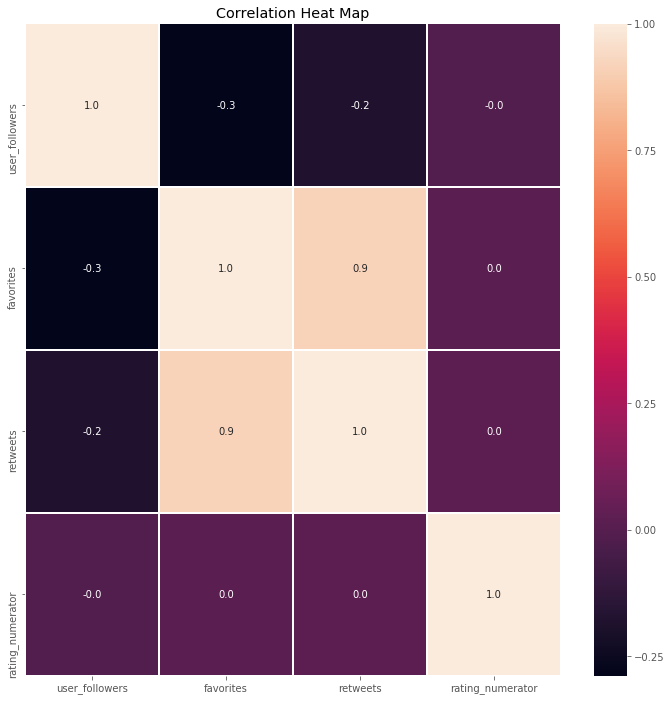

In [303]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_twitter_enhanced_clean[['source','user_followers','favorites','retweets',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

### Analyses
- Strong correlation between favorites and retweets, this is expected.
- Negative correlation between user followers and retweets, this is not expected.

### Visualization 2: Data partition on basis of Life stage of dogs

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

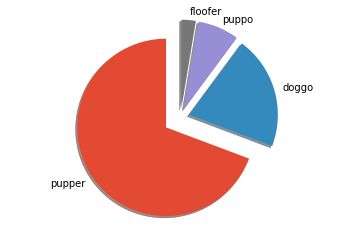

In [294]:
life_stage_count = list(df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_enhanced_clean[df_twitter_enhanced_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Analyses
- Dogs in __Pupper__ stage of dog life cycle get most tweets, which is expected.

### Visualization 3: Scatter plot between favorites and retweets. 

Text(0.5,1,'Retweets and favorites Scatter plot')

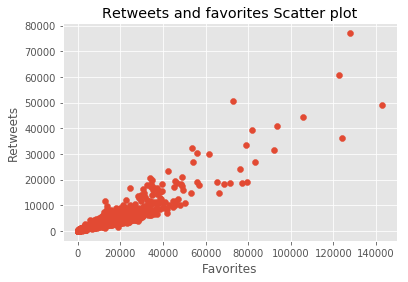

In [302]:
plt.scatter(df_twitter_enhanced_clean['favorites'], df_twitter_enhanced_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### Analyses
- As expected there is a big positive (+0.9; shown by correlation heat map) correlation between the retweets and favorites.


## End of Notebook